# 1. Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np

# 2. Adquisición de datos

In [2]:
# Path de datasets locales
Microdatos_2020_01_csv_path = 'Microdatos_2020_01.csv'
Microdatos_1999_01_csv_path = 'Microdatos_1999_01.csv'

# Crea DataFrame con toda la historia
df_exp1 = pd.read_csv(Microdatos_2020_01_csv_path, encoding='latin-1')
df_exp2 = pd.read_csv(Microdatos_1999_01_csv_path, encoding='latin-1')
df = pd.concat([df_exp1, df_exp2], ignore_index=True) # no se conservan los índices porque no son relevantes

# 3. Inspección inicial

Obtener información general sobre los datos, tal como la cantidad de filas y columnas, los valores de los datos, los tipos de datos y los valores faltantes en el conjunto de datos.

In [3]:
# Dimensiones de los datos
df.shape
# Hay poco mas de un millón y medio de registros, y 7 columnas

(1551362, 7)

In [4]:
# Visualización de los primeros y últimos 3 renglones, y 10 aleatorios.
display(df.head(3), df.tail(3), df.sample(10))

,FechaEncuesta,NombreAbsolutoCorto,NombreRelativoCorto,NombreAbsolutoLargo,NombreRelativoLargo,IdAnalista,Dato
0,2020-01-01,infgen_a20,infgent,Inflación general al cierre de 2020,Inflación general al cierre del año en curso (...,3,3.500
1,2020-01-01,infgen_a20,infgent,Inflación general al cierre de 2020,Inflación general al cierre del año en curso (...,4,3.540
2,2020-01-01,infgen_a20,infgent,Inflación general al cierre de 2020,Inflación general al cierre del año en curso (...,5,3.647


,FechaEncuesta,NombreAbsolutoCorto,NombreRelativoCorto,NombreAbsolutoLargo,NombreRelativoLargo,IdAnalista,Dato
1551359,2019-12-01,pibeu_a21,pibeutmas2,Tasa de crecimiento de Estados Unidos en 2021,Variación porcentual anual del PIB de Estados ...,65,2.2
1551360,2019-12-01,pibeu_a21,pibeutmas2,Tasa de crecimiento de Estados Unidos en 2021,Variación porcentual anual del PIB de Estados ...,92,1.9
1551361,2019-12-01,pibeu_a21,pibeutmas2,Tasa de crecimiento de Estados Unidos en 2021,Variación porcentual anual del PIB de Estados ...,94,2.0


,FechaEncuesta,NombreAbsolutoCorto,NombreRelativoCorto,NombreAbsolutoLargo,NombreRelativoLargo,IdAnalista,Dato
962162,2014-02-01,tc_m01_a15,tcmestmas11,Valor del tipo de cambio promedio durante ener...,Valor del tipo de cambio promedio durante el m...,60,12.50
897988,2013-06-01,varpib_a13,varpibt,"Variación porcentual anual del PIB, 2013","Variación porcentual anual del PIB, año en cur...",19,2.50
1174800,2016-06-01,infgen12m_m06_a16,infgen12meses,Inflación entre junio de 2016 y junio de 2017,Inflacióngeneral_12m_próximos,46,3.60
1186102,2016-07-01,infsub_prob_a18_r6,infsubptmas2rango6,"Inflación subyacente al cierre de 2018, probab...",Inflación subyacente al cierre dentro de dos a...,19,0.00
273380,2022-03-01,tc_m10_a22,tcmestmas7,Valor del tipo de cambio promedio durante octu...,Valor del tipo de cambio promedio durante el m...,22,21.27
1409014,2018-10-01,infsub_prob_a19_r8,infsubptmas1rango8,"Inflación subyacente al cierre de 2019, probab...",Inflación subyacente al cierre del siguiente a...,48,20.00
1098751,2015-08-01,infgen_prob_a12m_r5,infgen12mrango5,"Inflación general a 12 meses, prob. de que se ...",inflacióngeneral_prob12m(1.6-2.0),47,0.00
1208736,2016-10-01,infgen_prob_a18_r1,infgenptmas2rango1,"Inflación general al cierre de 2018, probabili...",Inflación general al cierre dentro de dos años...,8,0.00
340775,2022-10-01,infsub_m04_a23,infsubmestmas6,Inflación subyacente para abril de 2023,Inflación subyacente para dentro de 6 meses (m...,13,0.26
1195776,2016-08-01,varpib_prob_a16_r21,varpibptrango21,"Variación porcentual anual del PIB en 2016, pr...",Variación porcentual anual del PIB en el año e...,24,0.00


In [5]:
# Las columnas son: 'FechaEncuesta', 'NombreAbsolutoCorto', 'NombreRelativoCorto', 'NombreAbsolutoLargo',
# 'NombreRelativoLargo', 'IdAnalista', 'Dato'
df.columns

Index(['FechaEncuesta', 'NombreAbsolutoCorto', 'NombreRelativoCorto',
       'NombreAbsolutoLargo', 'NombreRelativoLargo', 'IdAnalista', 'Dato'],
      dtype='object')

In [6]:
# Tipos de las columnas
df.dtypes
# Sólo 2 se detectan como numéricas

FechaEncuesta           object
NombreAbsolutoCorto     object
NombreRelativoCorto     object
NombreAbsolutoLargo     object
NombreRelativoLargo     object
IdAnalista               int64
Dato                   float64
dtype: object

# 4. Preparación de los datos

## 4.1. Reducción de los datos

In [7]:
# Se eliminan las columnas con el nombre 'Absoluto' de la variable,
# porque son columnas derivadas de la columna FechaEncuesta y las columnas
# con nombre 'Relativo' y por tanto no agregan valor para el análisis.
df = df.drop(['NombreAbsolutoCorto', 'NombreAbsolutoLargo'], axis = 1)
df.head()

,FechaEncuesta,NombreRelativoCorto,NombreRelativoLargo,IdAnalista,Dato
0,2020-01-01,infgent,Inflación general al cierre del año en curso (...,3,3.500
1,2020-01-01,infgent,Inflación general al cierre del año en curso (...,4,3.540
2,2020-01-01,infgent,Inflación general al cierre del año en curso (...,5,3.647
3,2020-01-01,infgent,Inflación general al cierre del año en curso (...,7,3.500
4,2020-01-01,infgent,Inflación general al cierre del año en curso (...,8,3.870


## 4.2. Limpieza de los datos (duplicados, faltantes)

In [8]:
# No hay registros duplicados
df.duplicated().sum()

np.int64(988)

In [9]:
# No hay valores faltantes
df.isnull().sum()

FechaEncuesta          0
NombreRelativoCorto    0
NombreRelativoLargo    0
IdAnalista             0
Dato                   0
dtype: int64

## 4.3. Conversión de tipo de datos

In [10]:
print('Antes:')
display(df.dtypes)

# Convierte la FechaEncuesta a datetime
df['FechaEncuesta'] = pd.to_datetime(df['FechaEncuesta'], errors='raise')
print('\nDespués:')
display(df.dtypes, df.head())

Antes:


FechaEncuesta           object
NombreRelativoCorto     object
NombreRelativoLargo     object
IdAnalista               int64
Dato                   float64
dtype: object


Después:


FechaEncuesta          datetime64[ns]
NombreRelativoCorto            object
NombreRelativoLargo            object
IdAnalista                      int64
Dato                          float64
dtype: object

,FechaEncuesta,NombreRelativoCorto,NombreRelativoLargo,IdAnalista,Dato
0,2020-01-01,infgent,Inflación general al cierre del año en curso (...,3,3.500
1,2020-01-01,infgent,Inflación general al cierre del año en curso (...,4,3.540
2,2020-01-01,infgent,Inflación general al cierre del año en curso (...,5,3.647
3,2020-01-01,infgent,Inflación general al cierre del año en curso (...,7,3.500
4,2020-01-01,infgent,Inflación general al cierre del año en curso (...,8,3.870


In [11]:
# Observando los valores únicos por columna, no parece haber variables categóricas, sino sólo contínuas
df.nunique()

FechaEncuesta            309
NombreRelativoCorto      598
NombreRelativoLargo      601
IdAnalista                98
Dato                   26739
dtype: int64

## 4.4. Agregar columnas calculadas

In [12]:
df['AñoEncuesta'] = df['FechaEncuesta'].dt.year   # Columna con el año
df['MesEncuesta'] = df['FechaEncuesta'].dt.month  # Columna con el número de mes
display(df.dtypes, df.head(), df.tail())

FechaEncuesta          datetime64[ns]
NombreRelativoCorto            object
NombreRelativoLargo            object
IdAnalista                      int64
Dato                          float64
AñoEncuesta                     int32
MesEncuesta                     int32
dtype: object

,FechaEncuesta,NombreRelativoCorto,NombreRelativoLargo,IdAnalista,Dato,AñoEncuesta,MesEncuesta
0,2020-01-01,infgent,Inflación general al cierre del año en curso (...,3,3.500,2020,1
1,2020-01-01,infgent,Inflación general al cierre del año en curso (...,4,3.540,2020,1
2,2020-01-01,infgent,Inflación general al cierre del año en curso (...,5,3.647,2020,1
3,2020-01-01,infgent,Inflación general al cierre del año en curso (...,7,3.500,2020,1
4,2020-01-01,infgent,Inflación general al cierre del año en curso (...,8,3.870,2020,1


,FechaEncuesta,NombreRelativoCorto,NombreRelativoLargo,IdAnalista,Dato,AñoEncuesta,MesEncuesta
1551357,2019-12-01,pibeutmas2,Variación porcentual anual del PIB de Estados ...,59,1.9,2019,12
1551358,2019-12-01,pibeutmas2,Variación porcentual anual del PIB de Estados ...,61,1.6,2019,12
1551359,2019-12-01,pibeutmas2,Variación porcentual anual del PIB de Estados ...,65,2.2,2019,12
1551360,2019-12-01,pibeutmas2,Variación porcentual anual del PIB de Estados ...,92,1.9,2019,12
1551361,2019-12-01,pibeutmas2,Variación porcentual anual del PIB de Estados ...,94,2.0,2019,12


## 4.5. Simplificar nombres columnas

In [13]:
# Simplifica el nombre de las columnas
print('Antes:\n', df.columns)
df=df.rename(columns={
    'FechaEncuesta'      :'Fecha',
    'NombreRelativoCorto':'IdVariable',
    'NombreRelativoLargo':'Variable',
    'IdAnalista'         :'IdAnalista',
    'Dato'               :'Expectativa',
    'AñoEncuesta'        :'Año',
    'MesEncuesta'        :'Mes'
})
print('\nDespués:\n', df.columns)
display(df.head())

Antes:
 Index(['FechaEncuesta', 'NombreRelativoCorto', 'NombreRelativoLargo',
       'IdAnalista', 'Dato', 'AñoEncuesta', 'MesEncuesta'],
      dtype='object')

Después:
 Index(['Fecha', 'IdVariable', 'Variable', 'IdAnalista', 'Expectativa', 'Año',
       'Mes'],
      dtype='object')


,Fecha,IdVariable,Variable,IdAnalista,Expectativa,Año,Mes
0,2020-01-01,infgent,Inflación general al cierre del año en curso (...,3,3.500,2020,1
1,2020-01-01,infgent,Inflación general al cierre del año en curso (...,4,3.540,2020,1
2,2020-01-01,infgent,Inflación general al cierre del año en curso (...,5,3.647,2020,1
3,2020-01-01,infgent,Inflación general al cierre del año en curso (...,7,3.500,2020,1
4,2020-01-01,infgent,Inflación general al cierre del año en curso (...,8,3.870,2020,1


## 4.6. Homologación de valores

### Orden renglones

In [14]:
# Se ve desordenado por fecha
print('Antes:\n',df['Año'].unique())

# Ordenar por fecha
df=df.sort_values(by=['Año','Mes', 'Variable', 'IdAnalista'])
print('Después:\n',df['Año'].unique())

Antes:
 [2020 2021 2022 2023 2024 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
Después:
 [1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


### Orden columnas

In [15]:
print('Antes:')
display(df.columns,df.head())

df = df.reindex(columns=['Fecha','Año', 'Mes','IdVariable','Variable','IdAnalista','Expectativa'])

print('\nDespués:')
display(df.columns,df.head())

Antes:


Index(['Fecha', 'IdVariable', 'Variable', 'IdAnalista', 'Expectativa', 'Año',
       'Mes'],
      dtype='object')

,Fecha,IdVariable,Variable,IdAnalista,Expectativa,Año,Mes
594618,1999-01-01,saldopubt,Balance económico del sector público al cierre...,2,-1.9,1999,1
594619,1999-01-01,saldopubt,Balance económico del sector público al cierre...,4,-1.6,1999,1
594620,1999-01-01,saldopubt,Balance económico del sector público al cierre...,9,-1.3,1999,1
594621,1999-01-01,saldopubt,Balance económico del sector público al cierre...,10,-1.5,1999,1
594622,1999-01-01,saldopubt,Balance económico del sector público al cierre...,11,-1.4,1999,1



Después:


Index(['Fecha', 'Año', 'Mes', 'IdVariable', 'Variable', 'IdAnalista',
       'Expectativa'],
      dtype='object')

,Fecha,Año,Mes,IdVariable,Variable,IdAnalista,Expectativa
594618,1999-01-01,1999,1,saldopubt,Balance económico del sector público al cierre...,2,-1.9
594619,1999-01-01,1999,1,saldopubt,Balance económico del sector público al cierre...,4,-1.6
594620,1999-01-01,1999,1,saldopubt,Balance económico del sector público al cierre...,9,-1.3
594621,1999-01-01,1999,1,saldopubt,Balance económico del sector público al cierre...,10,-1.5
594622,1999-01-01,1999,1,saldopubt,Balance económico del sector público al cierre...,11,-1.4


### Homologación de Variables

#### Analizando idVariable y Variable

In [16]:
display(df['IdVariable'].unique().size, df['Variable'].unique().size)
# Parece que hay una disparidad entre el número de idVariable y Variable,
# porque debería ser el mismo número dado que se supone están pareadas.

598

601

In [17]:
# Buscar cualás IdVariable o Variable están repetidos.
df_vars_uniq=df[['IdVariable','Variable']].drop_duplicates()

df_vars_varcount=df_vars_uniq.groupby(['Variable']).count()
df_vars_varrepetida=df_vars_varcount[(df_vars_varcount['IdVariable']>1)]
print(df_vars_varrepetida.size) # cero

df_vars_idvarcount=df_vars_uniq.groupby(['IdVariable']).count()
df_vars_idvarrepetida=df_vars_idvarcount[(df_vars_idvarcount['Variable']>1)]
print(df_vars_idvarrepetida.size) # tres renglones con 2 repeticiones: tcmestmas1, tcmestmas2, tcmestmas3

display(df_vars_idvarrepetida)
df_variables_con_mismo_idVariable=df_vars_uniq[df_vars_uniq['IdVariable'].isin(['tcmestmas1','tcmestmas2','tcmestmas3'])]
display(df_variables_con_mismo_idVariable)
display(df_variables_con_mismo_idVariable['Variable'].unique())

0
3


,Variable
IdVariable,
tcmestmas1,2
tcmestmas2,2
tcmestmas3,2


,IdVariable,Variable
594456,tcmestmas1,Valor del tipo de cambio promedio durante el m...
594484,tcmestmas2,Valor del tipo de cambio promedio durante el m...
594512,tcmestmas3,Valor del tipo de cambio promedio durante el m...
601195,tcmestmas1,Valor del tipo de cambio al cierre del siguien...
629394,tcmestmas2,Valor del tipo de cambio al cierre dentro de d...
1229261,tcmestmas3,Valor del tipo de cambio al cierre dentro de t...


array(['Valor del tipo de cambio promedio durante el mes t+1',
       'Valor del tipo de cambio promedio durante el mes t+2',
       'Valor del tipo de cambio promedio durante el mes t+3',
       'Valor del tipo de cambio al cierre del siguiente año',
       'Valor del tipo de cambio al cierre dentro de dos años',
       'Valor del tipo de cambio al cierre dentro de tres años'],
      dtype=object)

In [18]:
# Se eliminan los renglones con esas variables incongruentes
arr_idVariables_a_quitar=df_variables_con_mismo_idVariable['IdVariable'].unique()
display(arr_idVariables_a_quitar)
df=df.query("IdVariable not in @arr_idVariables_a_quitar")

display((df.index.size-df.index.size)/df.index.size*100)
# Se quitaron aproximadamente el 2.6% de los renglones

array(['tcmestmas1', 'tcmestmas2', 'tcmestmas3'], dtype=object)

0.0

#### Intento de pasar las variables a columnas

In [19]:
# Practicando pasar las variables a columnas
df_subset=df.query("""
    IdVariable=='infgent' and Año==2024 and Mes==1 and IdAnalista in [4,5,6]
    """)
df_subset_varscols=df_subset.pivot(
    index=['Fecha','IdAnalista'],
    columns=['IdVariable'],
    values='Expectativa')
print('ORIGINAL -------------------------------------------------------')
display(df_subset)
print('Índice original     :\n',df_subset.index)
print('\nColumnas originales :\n',df_subset.columns)
print('\nCON VARIABLE EN COLUMNA ----------------------------------------')
display(df_subset_varscols.head())
print('Índice nuevo        :\n',df_subset_varscols.index)
print('\nColumnas nuevas     :\n',df_subset_varscols.columns)

ORIGINAL -------------------------------------------------------


,Fecha,Año,Mes,IdVariable,Variable,IdAnalista,Expectativa
494526,2024-01-01,2024,1,infgent,Inflación general al cierre del año en curso (...,4,4.33
494527,2024-01-01,2024,1,infgent,Inflación general al cierre del año en curso (...,5,4.64
494528,2024-01-01,2024,1,infgent,Inflación general al cierre del año en curso (...,6,3.70


Índice original     :
 Index([494526, 494527, 494528], dtype='int64')

Columnas originales :
 Index(['Fecha', 'Año', 'Mes', 'IdVariable', 'Variable', 'IdAnalista',
       'Expectativa'],
      dtype='object')

CON VARIABLE EN COLUMNA ----------------------------------------


IdVariable             infgent
Fecha      IdAnalista         
2024-01-01 4              4.33
           5              4.64
           6              3.70

Índice nuevo        :
 MultiIndex([('2024-01-01', 4),
            ('2024-01-01', 5),
            ('2024-01-01', 6)],
           names=['Fecha', 'IdAnalista'])

Columnas nuevas     :
 Index(['infgent'], dtype='object', name='IdVariable')


In [20]:
# En el dataset real
uniqvars=df['IdVariable'].unique()
uniqvars=np.delete(uniqvars,415)  # esta variable tiene repetidos, si se incluye aparece error: Index contains duplicate entries, cannot reshape
df_subset=df.query("IdVariable in @uniqvars")
try:
    df_varscols=df_subset.pivot(
        index=['Fecha','IdAnalista'],  # Año, Mes
        columns=['IdVariable'], # Variable
        values='Expectativa')
    display(df_varscols)
except Exception as e:
    print(e)

IdVariable             Inten_comp_1, mest  Inten_comp_2, mest  \
Fecha      IdAnalista                                           
1999-01-01 2                          NaN                 NaN   
           4                          NaN                 NaN   
           8                          NaN                 NaN   
           9                          NaN                 NaN   
           10                         NaN                 NaN   
...                                   ...                 ...   
2024-09-01 97                         NaN                 1.0   
           98                         NaN                 1.0   
           99                         NaN                 NaN   
           100                        NaN                 NaN   
           101                        NaN                 NaN   

IdVariable             Inten_comp_3, mest  Inten_comp_4, mest  \
Fecha      IdAnalista                                           
1999-01-01 2                          NaN                 NaN   
           4                          NaN                 NaN   
           8                          NaN                 NaN   
           9                          NaN                 NaN   
           10                         NaN                 NaN   
...                                   ...                 ...   
2024-09-01 97                         NaN                 NaN   
           98                         NaN                 NaN   
           99                         NaN                 NaN   
           100                        1.0                 NaN   
           101                        1.0                 NaN   

IdVariable             Inten_comp_5, mest  Inten_comp_6, mest  balcomt  \
Fecha      IdAnalista                                                    
1999-01-01 2                          NaN                 NaN  -8584.0   
           4                          NaN                 NaN  -5018.0   
           8                          NaN                 NaN  -5602.0   
           9                          NaN                 NaN  -6400.0   
           10                         NaN                 NaN  -8336.6   
...                                   ...                 ...      ...   
2024-09-01 97                         NaN                 NaN -16750.0   
           98                         NaN                 NaN -14133.0   
           99                         1.0                 NaN  -9300.0   
           100                        NaN                 NaN -14100.0   
           101                        NaN                 NaN -12684.0   

IdVariable             balcomtmas1  balcomtmas2  bonost  ...  varpibtrimt  \
Fecha      IdAnalista                                    ...                
1999-01-01 2                   NaN          NaN     NaN  ...         1.10   
           4                   NaN          NaN     NaN  ...         2.50   
           8                   NaN          NaN     NaN  ...         1.80   
           9                   NaN          NaN     NaN  ...         3.30   
           10                  NaN          NaN     NaN  ...         3.00   
...                            ...          ...     ...  ...          ...   
2024-09-01 97             -17250.0          NaN    9.00  ...         0.60   
           98             -11400.0          NaN   10.02  ...         1.48   
           99              -2600.0          NaN     NaN  ...          NaN   
           100            -16000.0          NaN    9.40  ...         1.34   
           101            -15790.0          NaN    9.00  ...         1.45   

IdVariable             varpibtrimtmas1  varpibtrimtmas2  varpibtrimtmas3  \
Fecha      IdAnalista                                                      
1999-01-01 2                       NaN              NaN              NaN   
           4                       NaN              NaN              NaN   
           8                       NaN 

**===> Se concluye que no es clara la ventaja de tener las variables como columnas**

#### Quitando las variables con múltiples Expectativas por Analista por Fecha

Un analista, en una fecha, para una variable, sólo puede tener un valor de Expectativa.

In [21]:
multiples_expectativas=df.duplicated(
    subset=['Fecha','Año','Mes','IdVariable','Variable','IdAnalista'], # todo excepto Expectativa
    keep=False # marca todos los renglones involucrados
)
# Verificando que la búsqueda de Expectativas múltiples sea correcta
#falsos     = multiples_expectativas[multiples_expectativas != False]
#verdaderos = multiples_expectativas[multiples_expectativas != True]
#display(falsos.size, verdaderos.size, falsos.size+verdaderos.size, df.shape)

renglones_multiples_expectativas=df.loc[multiples_expectativas]
idVariables_multiples_expectativas=renglones_multiples_expectativas['IdVariable'].unique()

# Investigando si estas variables siempre han tenido múltiples Expectativas por analista por mes
display(
    df.query('IdVariable in @idVariables_multiples_expectativas')['Año'].unique(),
    renglones_multiples_expectativas['Año'].unique())
# Se ve que en 2016 no había error.

array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=int32)

array([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=int32)

In [22]:
# No obstante, se eliminarán estas variables de el dataset.
df = df.query('IdVariable not in @idVariables_multiples_expectativas')
df.sample(10)

,Fecha,Año,Mes,IdVariable,Variable,IdAnalista,Expectativa
494748,2024-01-01,2024,1,infsubtmas1,Inflación subyacente al cierre del siguiente a...,48,3.910
517921,2024-03-01,2024,3,infsubmestmas11,Inflación subyacente para dentro de 11 meses (...,6,0.430
875783,2013-03-01,2013,3,infgen12mrango11,inflacióngeneral_prob12m(4.6-5.0),30,15.000
468686,2023-10-01,2023,10,varpibptrango3,Variación porcentual anual del PIB en el año e...,8,0.000
1438524,2019-01-01,2019,1,tcmest,Valor del tipo de cambio promedio durante el m...,21,19.000
914658,2013-08-01,2013,8,pibeutmas1,Variación porcentual anual del PIB de Estados ...,21,2.300
589309,2024-09-01,2024,9,varpibptrango9,Variación porcentual anual del PIB en el año e...,25,20.000
1412287,2018-10-01,2018,10,saldopubt,Balance económico del sector público al cierre...,12,-2.200
730027,2007-02-01,2007,2,tcmestmas4,Valor del tipo de cambio promedio durante el m...,20,11.244
1241368,2017-02-01,2017,2,infgenptmas1rango2,Inflación general al cierre del siguiente año ...,24,0.000


**====== PENDIENTE:**

Convertir variables categóricas (si/no; mucho/poco/nada).

5. Estadísticas descriptivas
6. Visualización
7. Análisis de variables
univariate, bivariate, or multivariate
8. Análisis de series de tiempo
When we analyze time series data, we can typically uncover patterns or trends that repeat over time and present a temporal seasonality. Key components of time series data include trends, seasonal variations, cyclical variations, and irregular variations or noise.}


# Estadísticas descriptivas

## Análisis de número de respuestas

<Axes: title={'center': 'Número de preguntas por año de la Encuesta (2024 año en curso)'}, xlabel='Año de la Enuesta'>

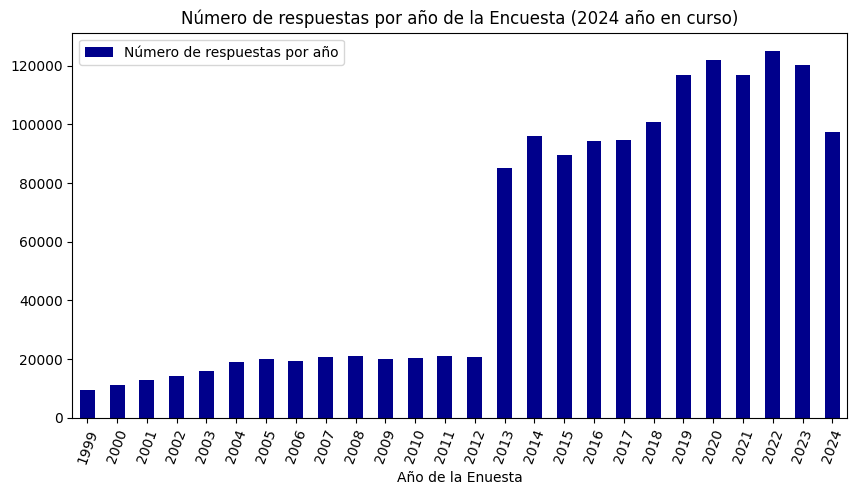

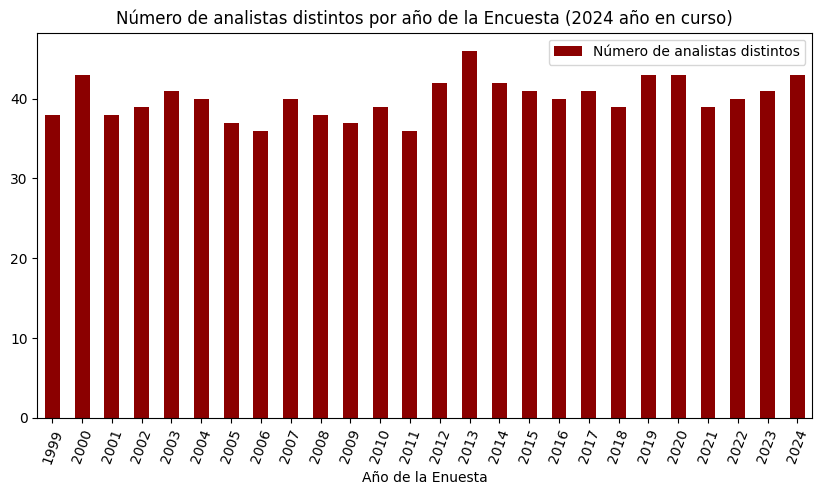

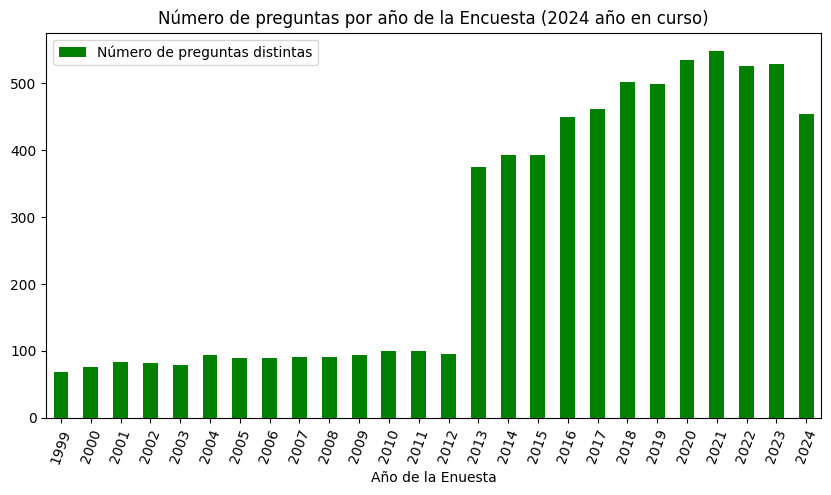

In [23]:
respuestasPorAño = df.groupby(by=["Año"])["Expectativa"].count()
respuestasPorAño.name = 'Número de respuestas por año'
respuestasPorAño.index.name = 'Año de la Enuesta'
respuestasPorAño.to_frame().plot.bar(
    title='Número de respuestas por año de la Encuesta (2024 año en curso)',
    rot=70,
    figsize=(10, 5),
    color='darkblue')

analistasDistintosPorAño = df.groupby(by=["Año"])["IdAnalista"].unique().apply(len)
analistasDistintosPorAño.name = 'Número de analistas distintos'
analistasDistintosPorAño.index.name = 'Año de la Enuesta'
analistasDistintosPorAño.to_frame().plot.bar(
    title='Número de analistas distintos por año de la Encuesta (2024 año en curso)',
    rot=70,
    figsize=(10, 5),
    color ='darkred')

analistasDistintosPorAño = df.groupby(by=["Año"])["Variable"].unique().apply(len)
analistasDistintosPorAño.name = 'Número de preguntas distintas'
analistasDistintosPorAño.index.name = 'Año de la Enuesta'
analistasDistintosPorAño.to_frame().plot.bar(
    title='Número de preguntas por año de la Encuesta (2024 año en curso)',
    rot=70,
    figsize=(10, 5),
    color ='g')

---

**Por tanto, se concluye que el aumento de respuestas desde 2013 se podría explicar por el aumento de preguntas más que por el aumento de analistas.**

---

## Análisis de la Expectativa de Inflación General Anual

,Año,Expectativa
594126,1999,16.20
594127,1999,15.43
594128,1999,17.61
594129,1999,15.98
594130,1999,17.80
...,...,...
583129,2024,4.84
583130,2024,4.46
583131,2024,4.70
583132,2024,4.42


Text(0.5, 1.0, 'Expectativa de Inflación General al cierre del año de la encuesta')

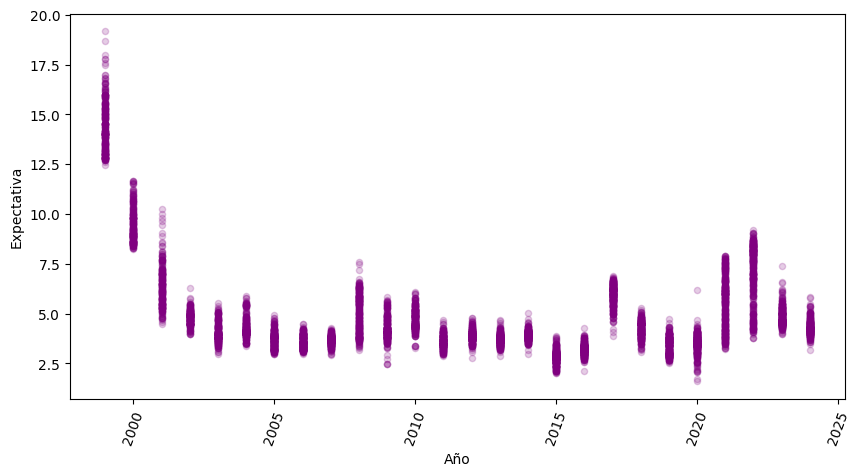

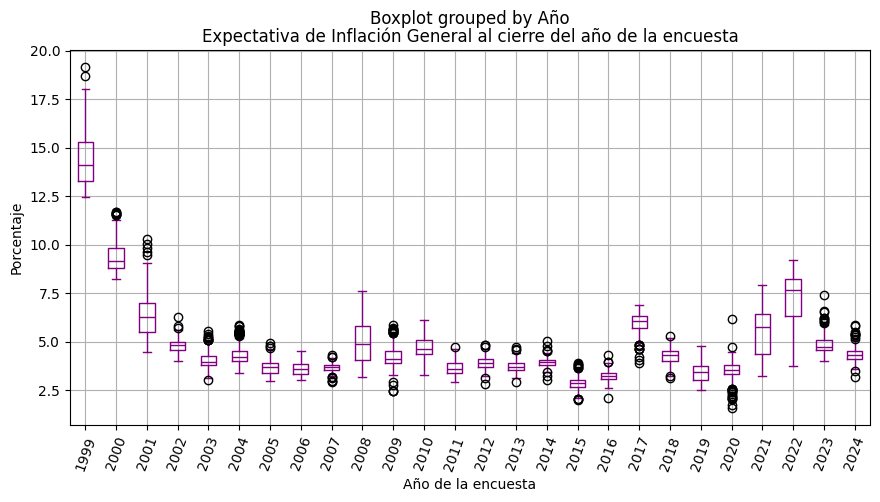

In [24]:
inflacion_general_anual = df.query('IdVariable=="infgent"')

inflacion_general_anual = inflacion_general_anual[['Año','Expectativa']] # Crea dataframe con sólo estas dos columnas
display(inflacion_general_anual)

inflacion_general_anual.plot.scatter(
    x='Año', y='Expectativa',
    rot=70,
    figsize=(10, 5),
    color='purple', alpha=0.2)

# Se asume que la distribución es normal, por lo que hacemos una gráfica de caja
axes = inflacion_general_anual.boxplot(
    column='Expectativa', by='Año',
    ylabel='Porcentaje', xlabel='Año de la encuesta',
    rot=70,
    figsize=(10, 5),
    color='purple')
axes.set_title('Expectativa de Inflación General al cierre del año de la encuesta')